In [16]:
import cv2 # should be 4.7
import glob
import matplotlib.pyplot as plt
import cv2.aruco as aruco
import numpy as np

print( cv2.__version__)

4.7.0


In [17]:


# OUR FINAL CAMERA CALIBRATION MATRIX
calibration = 0.6442544274536695
cameraMatrix = np.array([[932.35252209,   0.,         657.24325896],
 [  0.,         930.23581552, 357.42939289],
 [  0.,           0.,           1.        ]])
distCoeffs = np.array([[ 1.76279343e-01, -6.07952723e-01, -4.64176532e-04, -4.96839648e-04, 6.04867450e-01]])

In [18]:
def produce_cube_points(x, z):
    y = 1.3
    A = np.array([[x, y, z],
                  [x, y -  6., z],
                  [x - 6., y -  6., z],
                  [x - 6., y, z],
                  [x, y, z + 6.],
                  [x, y -  6., z + 6.],
                  [x - 6., y -  6., z + 6.],
                  [x - 6., y, z + 6.]])
    return A

def changeCoordinates(point, movement):
    angle = - movement[2]
    x_translation = - movement[0]
    z_translation = - movement[1]
    Rxz = np.array([[np.cos(angle), 0, -np.sin(angle)],
                    [0, 1, 0],
                    [np.sin(angle), 0, np.cos(angle)]])

    # Apply the rotation matrix to point P
    point_rotated = np.dot(Rxz, point)

    # Translate the coordinates of P by x and z
    return point_rotated + np.array([x_translation, 0, z_translation])

def points_with_movement(x, z, movement):
    A = produce_cube_points(x, z)
    for i in range(len(A)):
        A[i] = changeCoordinates(A[i], movement)
    return A

In [19]:
RELATIVE_PATH_CUBE = './*.jpg'
images_cube = sorted(glob.glob(RELATIVE_PATH_CUBE))
print(len(images_cube))

points3dOnCube = np.array([produce_cube_points(0., 160.),
                          produce_cube_points(30., 160.),
                          produce_cube_points(-20., 160.),
                          points_with_movement(-20., 160., [0.0427171547, - 0.0567852171, np.pi / 9]),
                          points_with_movement(0., 160., [0.0427171547, - 0.0567852171, np.pi / 9]),
                          points_with_movement(30., 160., [0.0427171547, - 0.0567852171, np.pi / 9]),
                          points_with_movement(-20., 160., [- 0.0427171547, 0.0567852171, - np.pi / 9]),
                          points_with_movement(0., 160., [- 0.0427171547, 0.0567852171, - np.pi / 9]),
                          points_with_movement(30., 160., [- 0.0427171547, 0.0567852171, - np.pi / 9])
                          ])


9


points3dOnCube1:   [[  0.    1.3 160. ]
 [  0.   -4.7 160. ]
 [ -6.   -4.7 160. ]
 [ -6.    1.3 160. ]
 [  0.    1.3 166. ]
 [  0.   -4.7 166. ]
 [ -6.   -4.7 166. ]
 [ -6.    1.3 166. ]]
point_2d:   [[[657 365]]

 [[657 330]]

 [[622 330]]

 [[622 365]]

 [[657 365]]

 [[657 331]]

 [[624 331]]

 [[624 365]]]


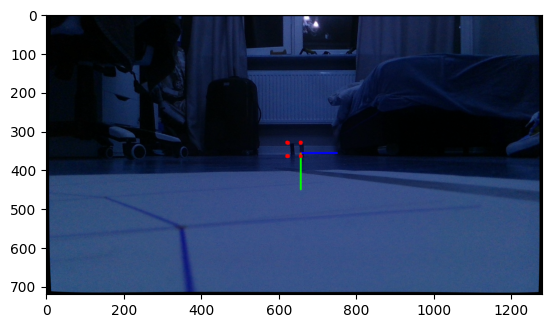

points3dOnCube1:   [[ 30.    1.3 160. ]
 [ 30.   -4.7 160. ]
 [ 24.   -4.7 160. ]
 [ 24.    1.3 160. ]
 [ 30.    1.3 166. ]
 [ 30.   -4.7 166. ]
 [ 24.   -4.7 166. ]
 [ 24.    1.3 166. ]]
point_2d:   [[[832 365]]

 [[832 330]]

 [[797 330]]

 [[797 365]]

 [[826 365]]

 [[826 331]]

 [[792 331]]

 [[792 365]]]


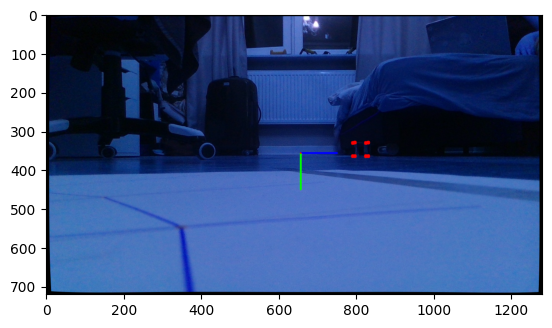

points3dOnCube1:   [[-20.    1.3 160. ]
 [-20.   -4.7 160. ]
 [-26.   -4.7 160. ]
 [-26.    1.3 160. ]
 [-20.    1.3 166. ]
 [-20.   -4.7 166. ]
 [-26.   -4.7 166. ]
 [-26.    1.3 166. ]]
point_2d:   [[[541 365]]

 [[541 330]]

 [[506 330]]

 [[506 365]]

 [[545 365]]

 [[545 331]]

 [[511 331]]

 [[511 365]]]


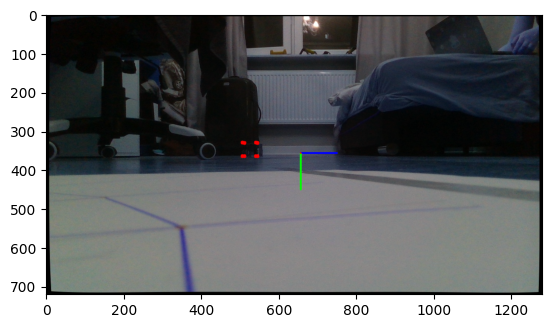

points3dOnCube1:   [[ 35.88665336   1.3        157.24800741]
 [ 35.88665336  -4.7        157.24800741]
 [ 30.24849764  -4.7        159.30012827]
 [ 30.24849764   1.3        159.30012827]
 [ 37.93877422   1.3        162.88616313]
 [ 37.93877422  -4.7        162.88616313]
 [ 32.3006185   -4.7        164.93828399]
 [ 32.3006185    1.3        164.93828399]]
point_2d:   [[[870 365]]

 [[870 330]]

 [[834 330]]

 [[834 365]]

 [[875 365]]

 [[875 331]]

 [[840 331]]

 [[840 365]]]


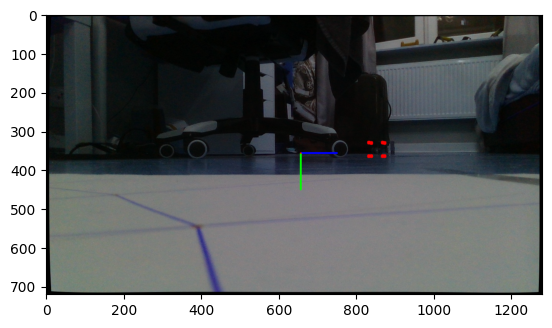

points3dOnCube1:   [[ 54.68050578   1.3        150.40760454]
 [ 54.68050578  -4.7        150.40760454]
 [ 49.04235005  -4.7        152.4597254 ]
 [ 49.04235005   1.3        152.4597254 ]
 [ 56.73262664   1.3        156.04576027]
 [ 56.73262664  -4.7        156.04576027]
 [ 51.09447091  -4.7        158.09788113]
 [ 51.09447091   1.3        158.09788113]]
point_2d:   [[[998 365]]

 [[999 328]]

 [[959 329]]

 [[959 365]]

 [[999 365]]

 [[999 329]]

 [[960 330]]

 [[960 365]]]


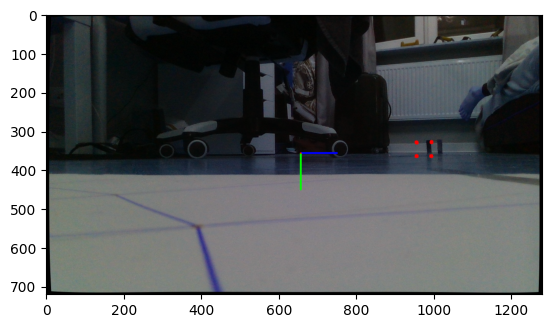

points3dOnCube1:   [[ 82.8712844    1.3        140.14700024]
 [ 82.8712844   -4.7        140.14700024]
 [ 77.23312868  -4.7        142.1991211 ]
 [ 77.23312868   1.3        142.1991211 ]
 [ 84.92340526   1.3        145.78515597]
 [ 84.92340526  -4.7        145.78515597]
 [ 79.28524954  -4.7        147.83727683]
 [ 79.28524954   1.3        147.83727683]]
point_2d:   [[[1211  366]]

 [[1211  326]]

 [[1167  326]]

 [[1167  366]]

 [[1204  366]]

 [[1204  327]]

 [[1161  328]]

 [[1161  366]]]


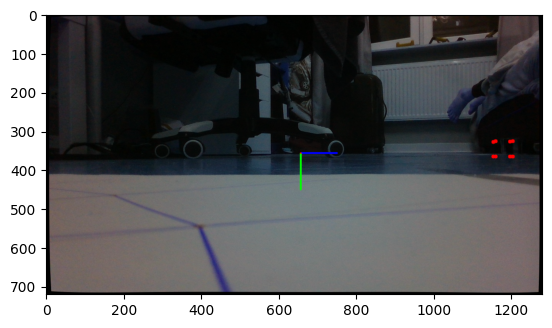

points3dOnCube1:   [[-73.47435819   1.3        143.45363124]
 [-73.47435819  -4.7        143.45363124]
 [-79.11251392  -4.7        141.40151038]
 [-79.11251392   1.3        141.40151038]
 [-75.52647905   1.3        149.09178697]
 [-75.52647905  -4.7        149.09178697]
 [-81.16463478  -4.7        147.03966611]
 [-81.16463478   1.3        147.03966611]]
point_2d:   [[[175 366]]

 [[175 327]]

 [[131 326]]

 [[131 366]]

 [[180 366]]

 [[180 328]]

 [[138 327]]

 [[138 366]]]


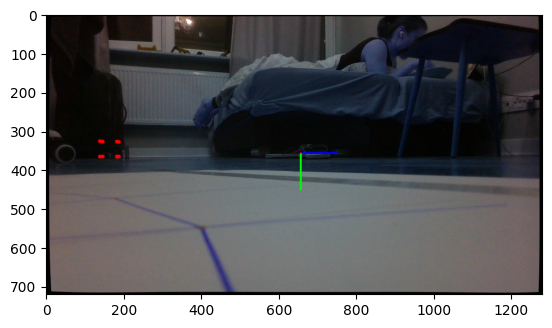

points3dOnCube1:   [[-54.68050578   1.3        150.29403411]
 [-54.68050578  -4.7        150.29403411]
 [-60.3186615   -4.7        148.24191325]
 [-60.3186615    1.3        148.24191325]
 [-56.73262664   1.3        155.93218983]
 [-56.73262664  -4.7        155.93218983]
 [-62.37078236  -4.7        153.88006897]
 [-62.37078236   1.3        153.88006897]]
point_2d:   [[[315 365]]

 [[315 328]]

 [[274 328]]

 [[274 366]]

 [[315 365]]

 [[315 329]]

 [[276 329]]

 [[276 365]]]


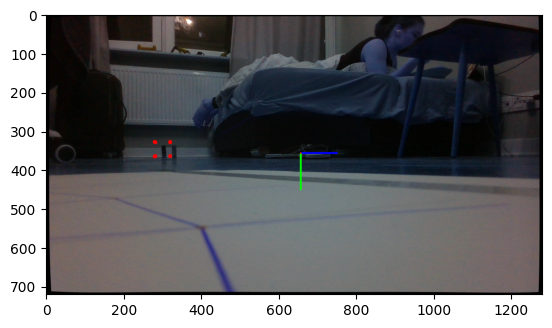

points3dOnCube1:   [[-26.48972715   1.3        160.55463841]
 [-26.48972715  -4.7        160.55463841]
 [-32.12788288  -4.7        158.50251755]
 [-32.12788288   1.3        158.50251755]
 [-28.54184801   1.3        166.19279413]
 [-28.54184801  -4.7        166.19279413]
 [-34.18000374  -4.7        164.14067327]
 [-34.18000374   1.3        164.14067327]]
point_2d:   [[[504 365]]

 [[504 330]]

 [[468 330]]

 [[468 365]]

 [[497 365]]

 [[497 331]]

 [[463 331]]

 [[463 365]]]


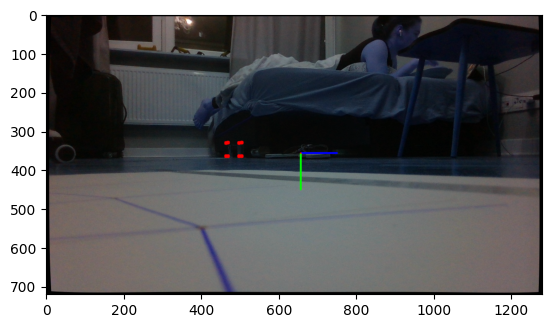

In [20]:
count = 0
for i in range(len(images_cube)):
    if i <= 100:
        points3dOnCube1 = points3dOnCube[i]
        img = cv2.imread(images_cube[i])
        
        img = cv2.drawFrameAxes(img, cameraMatrix, distCoeffs, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), 0.1) # draw the chessboard coordinate system

        # project the 3D point onto the image
        point_2d, _ = cv2.projectPoints(points3dOnCube1, np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 1.0]), cameraMatrix, distCoeffs)

        # round the pixel coordinates to integers
        point_2d = np.round(point_2d).astype(np.int32)
        
        print("points3dOnCube1:  ", points3dOnCube1)
        print("point_2d:  ", point_2d)
        colors=[(0, 0, 255), (0, 255, 0), (255, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0)]
    
        for x, y in point_2d[:,0,:]:
            img = cv2.circle(img, (x, y), radius=5, color=(255,0,0), thickness=-1)
            i += 1

        img = cv2.undistort(img, cameraMatrix, distCoeffs, None, cameraMatrix) # undistort the image (get's crazy)

        # uncomment this to see the result!
        plt.imshow(img)
        plt.show()
    
    count += 1